In [1]:
from style import HTMLStyler
styler = HTMLStyler()

In [2]:
styler.exec_styled_cell(0)

In [3]:
styler.exec_styled_cell(1)

In [4]:
styler.exec_styled_cell(2)

In [5]:
styler.exec_styled_cell(3)

In [6]:
styler.exec_styled_cell(4)

In [7]:
styler.exec_styled_cell(5)

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
plt.style.use('default')

pd.set_option("display.precision", 2)
np.set_printoptions(precision=2, suppress=True)

dataset = fetch_california_housing(as_frame=True)
housing = pd.concat([dataset.data, dataset.target], axis=1)

In [9]:
styler.exec_styled_cell(6)

In [10]:
styler.exec_styled_cell(7)

In [11]:
styler.exec_styled_cell(8)

In [12]:
styler.exec_styled_cell(9)

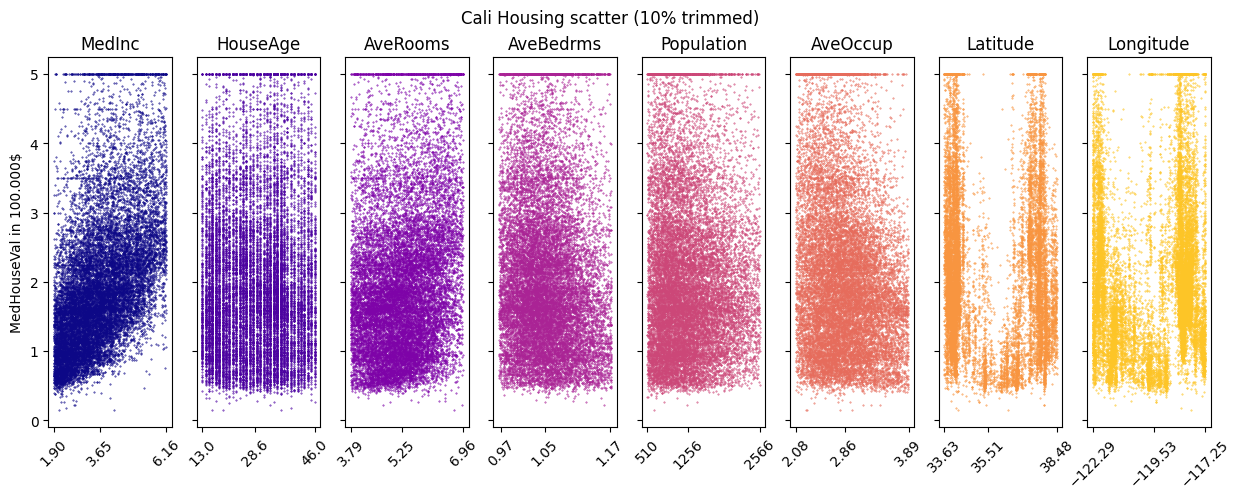

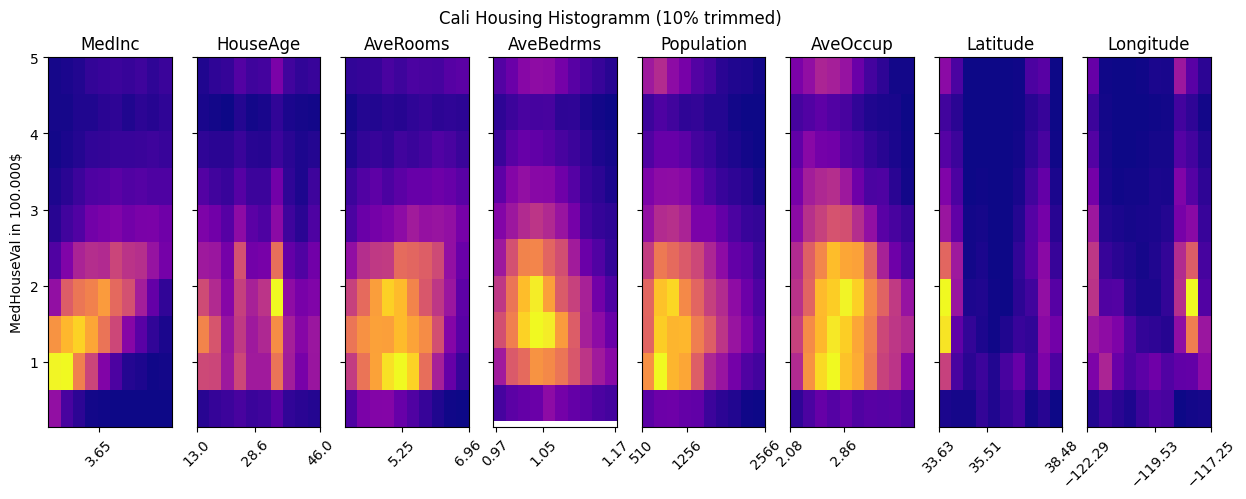

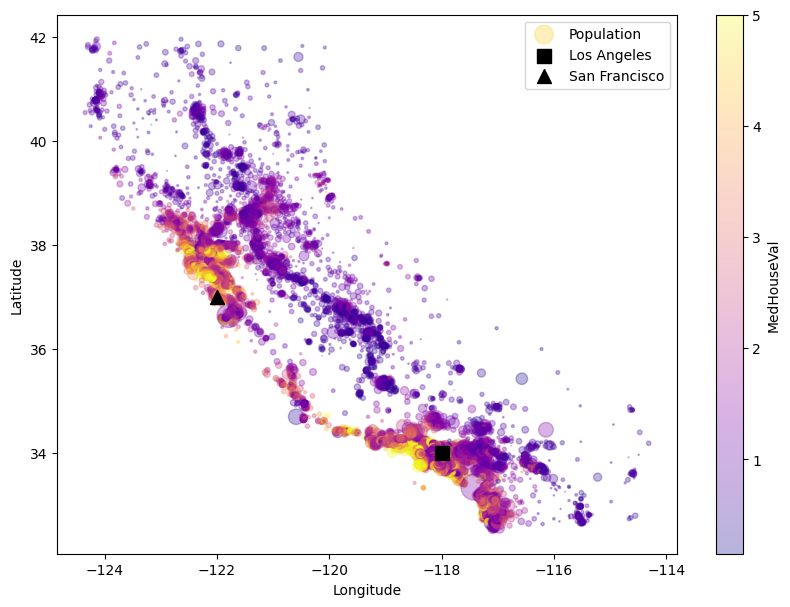

In [13]:
from printing import scatter_2d_dataset
from printing import hist_2d_dataset
from printing import map_plot

features = housing.drop("MedHouseVal",axis=1)
target = housing["MedHouseVal"]

x = features.to_numpy()
y = target.to_numpy()
naming = features.columns.values.tolist()

scatter_2d_dataset(
    x, y, naming, title="Cali Housing scatter (10% trimmed)", alpha=1, trim_percent=10)

hist_2d_dataset(
    x, y, naming, title="Cali Housing Histogramm (10% trimmed)", trim_percent=10)

map_plot(pd.concat([features, target], axis=1))


In [14]:
styler.exec_styled_cell(13)

In [15]:
styler.exec_styled_cell(14)

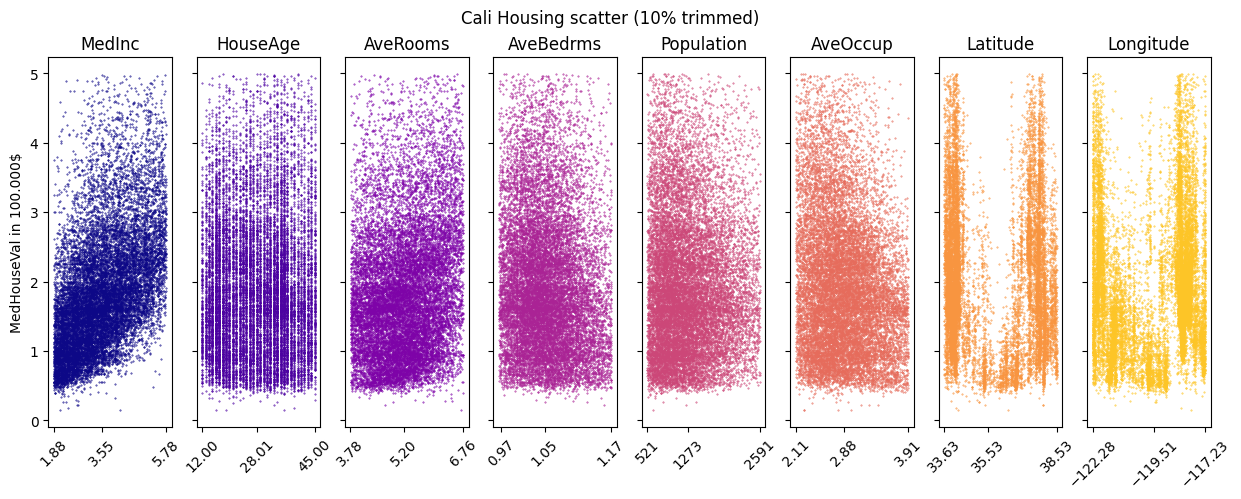

In [16]:
housing = housing[housing["MedHouseVal"] != 3.5]
housing = housing[housing["MedHouseVal"] != 4.5]
housing = housing[housing["MedHouseVal"] < 5]


x = housing.drop("MedHouseVal",axis=1).to_numpy()
y = housing["MedHouseVal"].to_numpy()
naming = features.columns.values.tolist()

scatter_2d_dataset(
    x, y, naming, title="Cali Housing scatter (10% trimmed)", alpha=1, trim_percent=10)

In [17]:
styler.exec_styled_cell(16)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x train size: {x_train.shape}")
print(f"y train size: {y_train.shape}")
print(f"x test size: {x_test.shape}")
print(f"y test size: {y_test.shape}")


x train size: (15625, 8)
y train size: (15625,)
x test size: (3907, 8)
y test size: (3907,)


In [19]:
styler.exec_styled_cell(17)

In [20]:
styler.exec_styled_cell(19)

In [21]:
styler.exec_styled_cell(22)

In [22]:
from sklearn.tree import DecisionTreeRegressor

hyperparameters = {
    "criterion": "absolute_error",
    "max_depth": 30,
    "min_samples_split": 15,
    "min_samples_leaf": 10,
}

regr = DecisionTreeRegressor(**hyperparameters)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)


In [23]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")

r2_score: 0.70
mape: 19.61%


In [24]:
styler.exec_styled_cell(23)

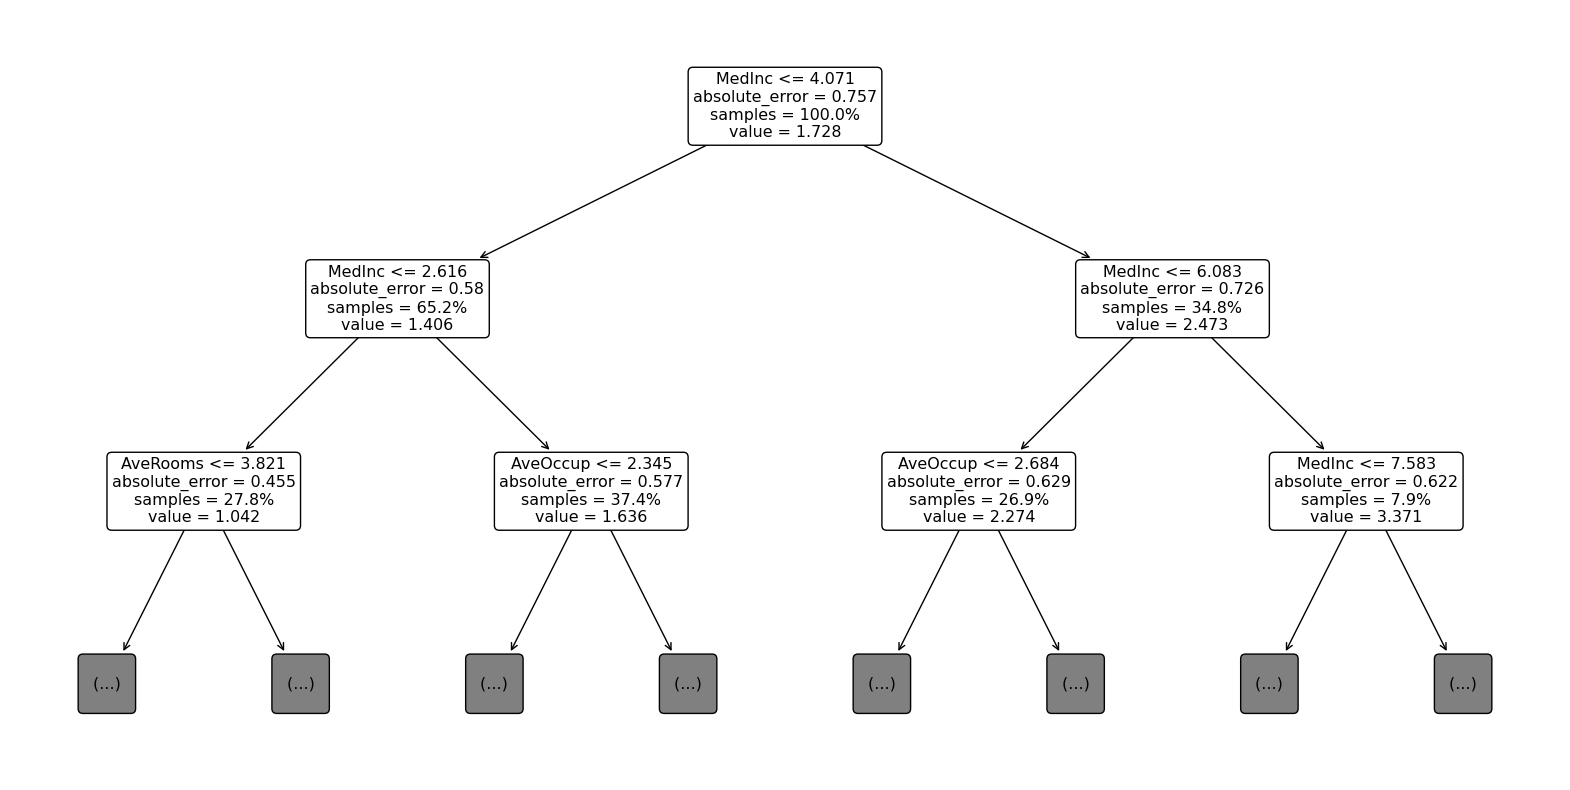

In [25]:
from printing import plot_prescaled_tree

plot_prescaled_tree(
    x=x,
    y=y,
    params=regr.get_params(),
    feature_names=housing.columns.values.tolist()
)


In [26]:
styler.exec_styled_cell(24)


In [27]:
import joblib

joblib.dump(regr, "Cali_Housing_DecissionTree.pkl", compress=9)


['Cali_Housing_DecissionTree.pkl']

In [ ]:
styler.exec_styled_cell(25)


In [28]:
local_model = joblib.load("Cali_Housing_DecissionTree.pkl")
# local_model.predict(X)


In [29]:
styler.exec_styled_cell(26)

In [30]:
styler.exec_styled_cell(27)

In [31]:
styler.exec_styled_cell(28)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

regr = GradientBoostingRegressor()

hyperparams = {
    "loss": ["absolute_error","huber","quantile"],
    "n_estimators": [250],
    "max_depth": [35,50],
    "min_samples_split": [60, 65],
    "min_samples_leaf": [5],
}

grid = GridSearchCV(regr, hyperparams, cv=5, scoring="r2", n_jobs=-1)
grid.fit(x_train, y_train)

mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_scores = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]

for mean, std, params in zip(mean_test_scores, std_test_scores, params):
    print(f"params: {params}, mean: {mean:.2f}, std: {std:.2f}")

best_params = grid.best_params_
best_score = grid.best_score_

print(f"best_params: {best_params}")
print(f"best_score: {best_score:.2f}")

params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 45, 'n_estimators': 200}, mean: 0.83, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 45, 'n_estimators': 250}, mean: 0.83, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 45, 'n_estimators': 300}, mean: 0.83, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 60, 'n_estimators': 200}, mean: 0.83, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 60, 'n_estimators': 250}, mean: 0.84, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 60, 'n_estimators': 300}, mean: 0.84, std: 0.01
params: {'loss': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 80, 'n_estimators': 200}, mean: 0.84, st

In [ ]:
"""best_params: {'loss': 'absolute_error', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 60, 'n_estimators': 250}
best_score: 0.84"""

regr = GradientBoostingRegressor(**best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {score:.2f}")
print(f"mape: {mape*100:.2f} %")

"""
r2_score: 0.83
mape: 16.18 %
"""

r2_score: 0.83
mape: 16.18 %
